<a href="https://colab.research.google.com/github/pavansuraj12/Employee-Burnout-Prediction/blob/main/Employee%20Burnout%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Employee Burnout Prediction**

### **Importing necessary libraries**

In [47]:
#Importing the necessary Libraries
import pandas as pd #used for data manipulations and data analysis
import numpy as np #used for arrays, it is also known as numerical python to support mathemtical operations and it supports 'n' dimentional, for scentiifc computation and arrays related concepts
import matplotlib.pyplot as plt #used for data visualisation
import seaborn as sns #used for data visualisation on complex datasets
from sklearn.model_selection import train_test_split #used for training and testing of model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle as pickle #this is used for storing the data like processed data and so on
import os #used for file operations (like opening a file, reading a file etc..)

### **Loading Dataset**

In [48]:
#declared the variable named data and stored the data set named employee_burnour_analysis in the variable and this is done using the library
#pandas which is used for data manipulation and data analysis
data = pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

### **Data Overview**

In [49]:
data.head()
#the function data.head() is used for displaying the values from the beginning of the dataset
#the default no of values it displays is 5 without any parameter
#if we give any parameter like 10 or any number 'x' then it displays x number of entries from the beginning of the dataset
#the below result are the 1st 5 entries of the dataset

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [50]:
data.tail()
#the function data.tail() is used for displaying values from the end of the dataset
#the default no of values it displays is 5 without any parameter
#if we give any parameter like 10 or any number 'x' then it displays x number of entries from the bottom of the dataset
#the below result are the last 5 entries of the dataset

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [51]:
data.describe()
#describe() The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values
#of the Series or DataFrame.(like mean, mode, quartile, standard deviation)

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [52]:
data.nunique()
#The nunique() method returns the number of unique values for each column.

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [53]:
data.info()
#The info() method prints information about the DataFrame. The information contains the number of columns, column labels,
#column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [54]:
data.isna().sum()
#the return type of isna() is boolean so it returns true if there are null values and returns false if there are no nulll values
#isna().sum() is used to sum all the null values present in each column and return in integer type
#this displays the no unique values present in each column

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [55]:
data.isnull().sum()
#this displays the no unique values present in each column

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [56]:
data.isnull().sum().values.sum()
#this statement gives the overall  null values in the whole dataset or dataframe
#this does not give for each column, it gives for the whole dataset

4622

### **EDA (Exploratory Data Analysis)**

In [57]:
data.corr(numeric_only=True)['Burn Rate'][:-1]
#The corr() method is used to find the pairwise correlation of all columns in the DataFrame.
#numeric_only=True this is used to find the correlation for all the data with numeric datatype
#all these columns are the correlation with the burnnout rate
#like Designation  =  0.736412 is the correaltion of the Designation with the burnout rate(like how much percentage they are related or they effect each other)

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

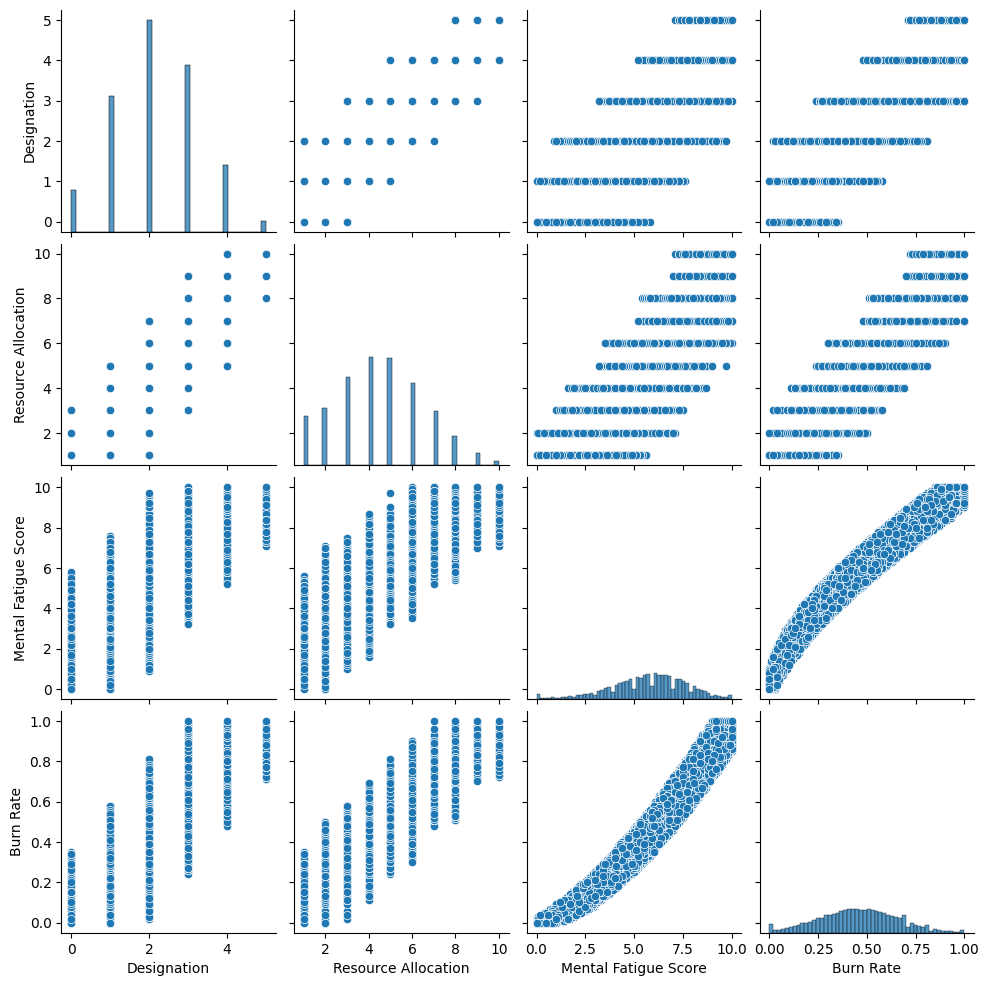

In [58]:
sns.pairplot(data)
plt.show()
#This command creates a pairplot of the DataFrame `data`, which includes scatter plots for each pair of numeric columns
#and histograms for each individual numeric column, and then displays the plot.
#this give the visualisation of correlation btw the columns

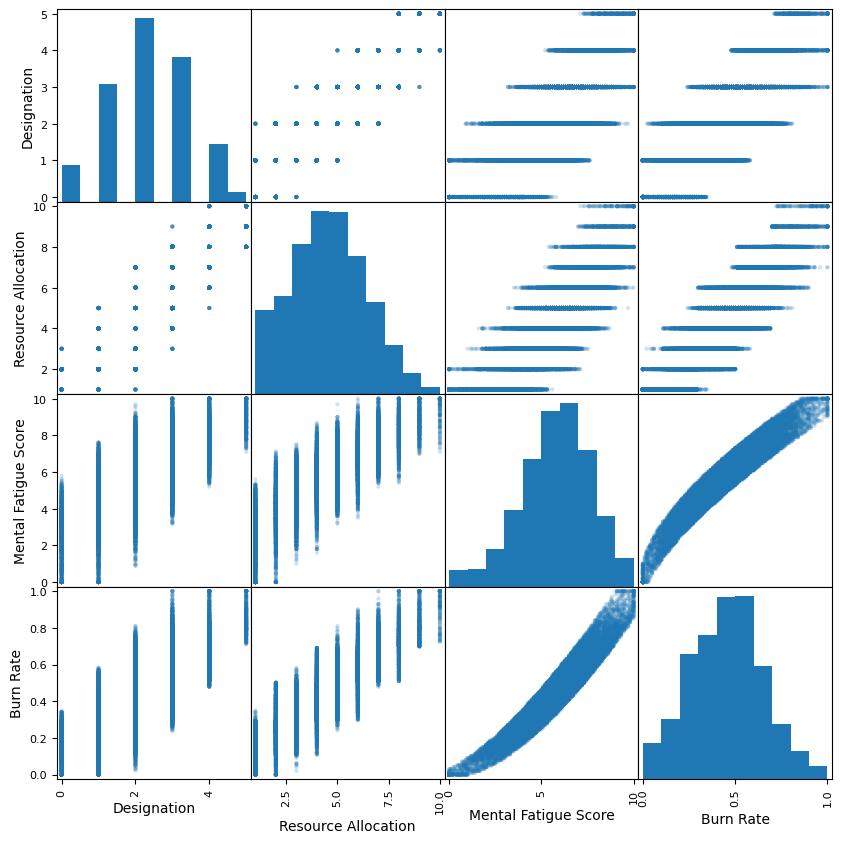

In [59]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(10, 10))
plt.show()
#This command generates a scatter plot matrix for all pairs of columns in the DataFrame data, with a transparency level of 0.2
#and a figure size of 10x10, and then displays the plot.

In [60]:
data.shape
#this is used displaying the no of rows and columns present in the dataset

(22750, 9)

In [61]:
data = data.dropna()
#this is used for droping the null values

In [62]:
data.shape

(18590, 9)

In [63]:
data.dtypes
#this function is used for displaying the datatypes of the columns or features available

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [64]:
data = data.drop(columns='Employee ID')
#this is used for droping the column names Employee ID
#we dropped this column as it does not effect the burn rate

In [65]:
data
#displayig the dataset

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...,...
22743,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48
22744,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22746,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22748,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [66]:
data.isnull().sum().values.sum()
#calculating the total no of null values in the given dataset

0

Min date 2008-01-01 00:00:00
Min date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

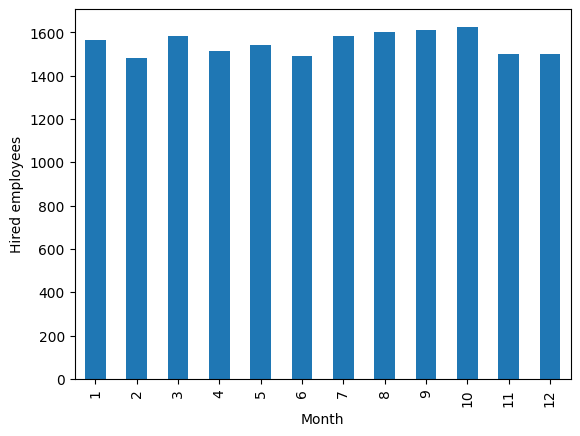

In [67]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Min date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month['Date of Joining'] = data_month['Date of Joining'].astype('datetime64[ns]')
data_month['Date of Joining'].groupby(data_month['Date of Joining'].dt.month).count().plot(kind = 'bar', xlabel = 'Month', ylabel ='Hired employees')

#This code snippet prints the earliest and latest dates from the 'Date of Joining' column, converts this column to datetime format, groups
#the data by the month of joining, counts the number of hires per month, and then plots these counts as a bar chart with 'Month' on the x-axis
#and 'Hired employees' on the y-axis

In [68]:
data

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
...,...,...,...,...,...,...,...,...
22743,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48
22744,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22746,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22748,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


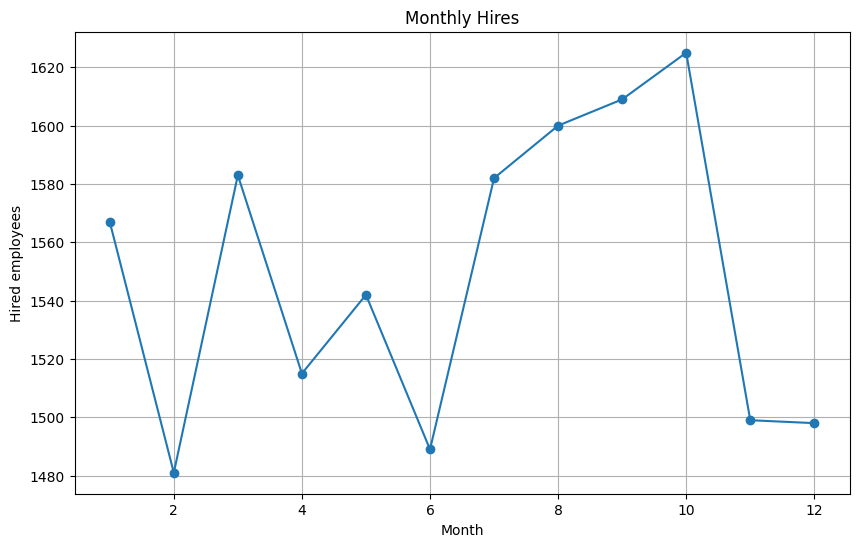

In [69]:

monthly_hires = data_month['Date of Joining'].groupby(data_month['Date of Joining'].dt.month).count()
plt.figure(figsize=(10, 6))
plt.plot(monthly_hires.index, monthly_hires.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Hired employees')
plt.title('Monthly Hires')
plt.grid(True)
plt.show()

#This code calculates the number of hires per month, creates a line plot with markers showing the monthly hires,
#and then displays the plot with labeled axes, a title, and a grid for better readability.

In [70]:
data_2008 = pd.to_datetime(["2008-01-01"] * len(data)) #from date of joining to this particular date how many days they are working
data["Days"] = data['Date of Joining'].astype('datetime64[ns]').sub(data_2008).dt.days #
data.Days
#from this we can get the most senior person
#This code calculates the number of days each employee has been working from their 'Date of Joining' until January 1, 2008, adds this as a
#new column 'Days' to the DataFrame, and then displays the 'Days' column, allowing identification of the most senior employee.

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [71]:
#we should select olny the numberis data before calculating the correlation
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

#This code selects only the numeric columns from the DataFrame data, calculates the correlation of each of these numeric columns with the
#'Burn Rate' column, and prints the resulting correlation values.

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [72]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [73]:
data = data.drop(['Date of Joining','Days'],axis=1)
#droping the column names Date of Joining and days from the data set or the dataframe

In [74]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


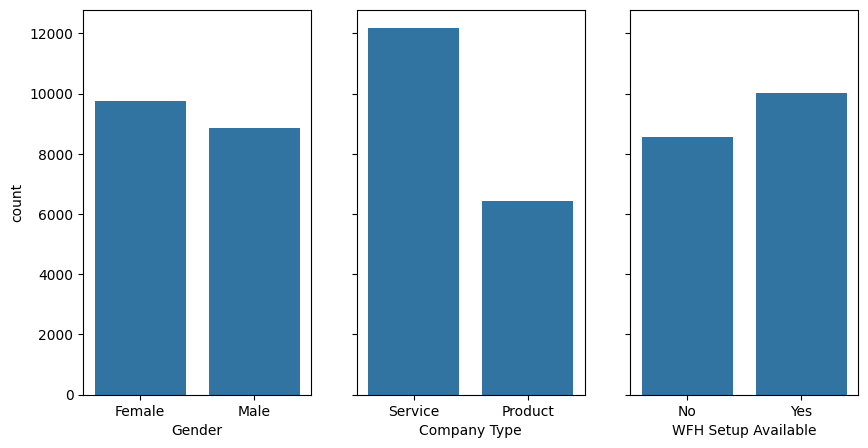

In [75]:
cat_columns  = data.select_dtypes('object').columns
fig, ax = plt.subplots(nrows = 1, ncols =len(cat_columns),sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

#This code creates a series of count plots, one for each categorical column in the DataFrame `data`, arranged in a single row and
#sharing the y-axis, to visualize the distribution of categories within each column.

In [76]:
#checking if the column exists before apllying get_dummies
if all(col in data.columns for col in ['Company Type','WFH Setup Available','Gender']):
  data = pd.get_dummies(data, columns=['Company Type','WFH Setup Available','Gender'],drop_first=True)
  data.head()
  encoded_columns = data.columns
else:
  print("ERROR : one or more columns not present in the DataFrame.")
  print(data.columns)

#This code checks if the columns 'Company Type', 'WFH Setup Available', and 'Gender' exist in the DataFrame data, applies one-hot encoding
#to these columns if they do, and prints the first few rows of the modified DataFrame and the names of the new columns, otherwise, it prints
#an error message with the available columns.

### Preprocessing

In [77]:
#spliti dataframe into x and y
y=data['Burn Rate']
x = data.drop('Burn Rate', axis=1)

In [78]:
#train-test split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.7,shuffle = True, random_state=1)

#scale x
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = pd.DataFrame(scaler.transform(xtrain),index =xtrain.index, columns = xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),index =xtest.index, columns = xtest.columns)

#This code splits the data into training and testing sets with 70% of the data for testing, scales the features using `StandardScaler`
#on the training set, and applies the same scaling to the testing set.

In [79]:
scaler_filename = '../models/scaler.pkl'
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

#This code creates the directory for the scaler file if it doesn't exist and then saves the `StandardScaler` object to a file named
#'scaler.pkl' using pickle.

In [80]:
xtrain

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
3249,0.729794,0.733212,0.501849,0.714251,-1.104601,1.049455
7925,0.729794,0.733212,0.398570,-1.400068,0.905304,1.049455
16635,-0.155002,-0.730675,-1.925209,0.714251,-1.104601,1.049455
3456,1.614590,0.733212,1.224802,-1.400068,-1.104601,-0.952875
17562,0.729794,0.245250,-0.169465,0.714251,-1.104601,1.049455
...,...,...,...,...,...,...
13453,0.729794,1.221175,1.637919,-1.400068,0.905304,-0.952875
21179,0.729794,0.245250,-1.047337,0.714251,0.905304,1.049455
6327,0.729794,0.245250,0.088733,0.714251,-1.104601,1.049455
14933,-0.155002,0.245250,0.708407,0.714251,-1.104601,1.049455


In [81]:
ytrain

3249     0.62
7925     0.50
16635    0.13
3456     0.66
17562    0.42
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 5577, dtype: float64

In [82]:
#saving processed data
path = '../data/processed'
os.makedirs(path, exist_ok=True)
xtrain.to_csv(path+'xtrain_processes.csv',index=False)
xtest.to_csv(path+'xtest_processes.csv',index=False)

#This code creates the directory for processed data if it doesn't exist and then saves the xtrain and xtest DataFrames as CSV files
#in that directory.

### Model Building

### Linear Regression

In [83]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(xtrain,ytrain)

#This code initializes a `LinearRegression` model and trains it using the `xtrain` and `ytrain` data.

LinearRegression()

In [84]:
print("Linear Regressioin Performance Model")
#Making peredictionns on the test model
ypred = linear_regression_model.predict(xtest)

#calculating the mean square error
mse = mean_squared_error(ytest,ypred)
print("Mean Squared Error : ",mse)

#calculating the root mean square error
rmse = mean_squared_error(ytest,ypred,squared=False)
print("Root Mean Squared Error : ",rmse)

#calculating the mean absolute error
mae = mean_absolute_error(ytest,ypred)
print("Mean Absolute Error : ",mae)

#calculating the R-squared score
r2 = r2_score(ytest,ypred)
print("R-squared Score : ",r2)

#This code evaluates the performance of a trained linear regression model by making predictions on the test set,
#and then calculates and prints the Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, and R-squared score.

Linear Regressioin Performance Model
Mean Squared Error :  0.0031265186703183815
Root Mean Squared Error :  0.05591528118786833
Mean Absolute Error :  0.045748186923994995
R-squared Score :  0.9199255887706531
